In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
data, labels =datasets.make_blobs(centers=[[-0.5,-0.5],[0.5,0.05]],n_samples=1000,cluster_std=0.4)

In [3]:
X=torch.Tensor(data)
Y=torch.Tensor(labels)

In [4]:
Y=Y.unsqueeze(1)

In [5]:
model=nn.Linear(2,1)

In [6]:
def getY(model,X):
    weights, bias=list(model.parameters())
    w1,w2=weights[0]
    b=bias[0]
    
    return (w1*X+b)/-w2

In [7]:
def plotModel(model):
    x=torch.Tensor([-2,2])
    y=getY(model,x).detach().numpy()
    
    x=x.detach().numpy()
    
    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1])
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1])
    plt.plot(x,y)

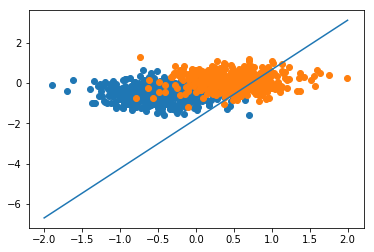

In [8]:
plotModel(model)

In [9]:
criterium=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [10]:
losses=[]
for index in range(1000):
    y_pred=torch.sigmoid(model(X))
    loss=criterium(y_pred, Y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [11]:
indexes=[a for a in range(1000)]

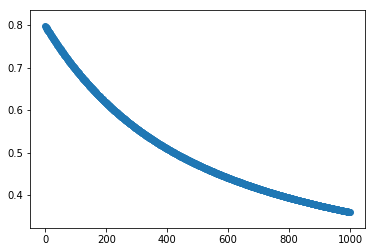

In [12]:
plt.scatter(indexes,losses)

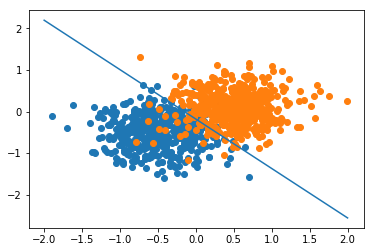

In [13]:
 plotModel(model)